# Clasificación binaria con Regresión Logística

Este notebook utiliza un modelo de regresión logística para predecir si la radiación solar supera cierto umbral. Se entrena el modelo, se evalúa, y se hacen predicciones nuevas, todo usando `scikit-learn`.


### 1. Generación del conjunto de datos

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc

# Cargar el archivo CSV
df = pd.read_csv("AllData.csv")
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,direccion_viento,humedad_relativa,radiacion_solar,temp_aire,vel_viento,mp10_val
0,206.5,60.0,31.0,18.6,10.2,22.5369
1,194.1,55.0,30.3,20.3,10.2,39.0410
2,186.4,47.2,25.1,20.0,9.0,43.8277
3,170.5,54.8,15.8,16.0,9.2,34.0361
4,156.8,47.3,10.6,14.7,8.5,32.6348


### 2. Modificación del conjunto de datos

In [13]:
# Definir variables X e y
# columna objetivo debe ser binaria: 0 y 1
X = df.drop("radiacion_solar", axis=1)
y = (df["radiacion_solar"] > 20).astype(int)

# Convertir todas las columnas categóricas (strings) a variables numéricas con One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Asegurar que todos los valores estén limpios (sin NaNs ni strings)
X = X.apply(pd.to_numeric, errors='coerce')  # fuerza conversión a números
X = X.fillna(0)  # reemplaza NaNs por 0 (o podrías usar promedio/mediana)

# Confirmar que X está lista
print(X.dtypes)
print("Tamaño final de X:", X.shape)

direccion_viento    float64
humedad_relativa    float64
temp_aire           float64
vel_viento          float64
mp10_val            float64
dtype: object
Tamaño final de X: (69, 5)


### 3. Construcción del modelo

In [14]:
# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

In [15]:
# Evaluar el modelo
print("Precisión (accuracy):", accuracy_score(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión (accuracy): 0.9285714285714286
Matriz de confusión:
[[5 0]
 [1 8]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.89      0.94         9

    accuracy                           0.93        14
   macro avg       0.92      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14



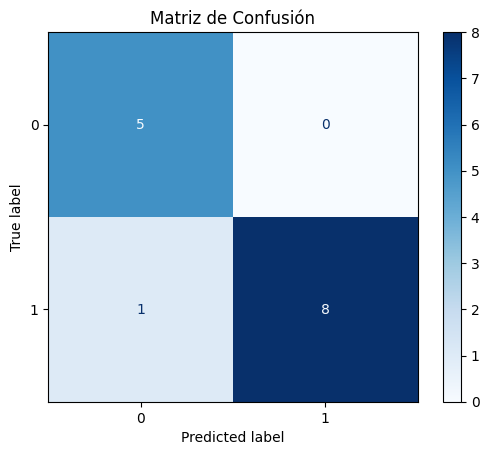

In [16]:
# Visualización de la matriz de confusión
ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, cmap="Blues")
plt.title("Matriz de Confusión")
plt.grid(False)
plt.show()

### 4. Predicción de nuevos ejemplos

In [23]:
# Reemplaza con valores acordes a tus columnas reales
X_nuevo = pd.DataFrame([[1.5,20.0,2.0]], columns=["humedad_relativa","radiacion_solar", "temp_aire"])

# Cuando entrenaste el modeloe se cambio el orden/estructura de las columnas de X, y hay que reindexar:
X_nuevo = X_nuevo.reindex(columns=X.columns, fill_value=0)

# Predicción de clase
prediccion = modelo.predict(X_nuevo)
print(" Clase predicha:", prediccion[0])

# Predicción de probabilidad
proba = modelo.predict_proba(X_nuevo)
print(f" Probabilidad clase 0: {proba[0][0]:.2f}")
print(f" Probabilidad clase 1: {proba[0][1]:.2f}")

 Clase predicha: 0
 Probabilidad clase 0: 1.00
 Probabilidad clase 1: 0.00
